In [161]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
#导入数据
order = pd.read_csv('instacart/order_products__train.csv')
aisle = pd.read_csv('instacart/aisles.csv')
product = pd.read_csv('instacart/products.csv',encoding='gbk')

In [222]:
order.head(10)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
5,1,13176,6,0
6,1,47209,7,0
7,1,22035,8,1
8,36,39612,1,0
9,36,19660,2,1


In [6]:
aisle.head(5)

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [7]:
product.head(5)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19.0
1,2,All-Seasons Salt,104,13.0
2,3,Robust Golden Unsweetened Oolong Tea,94,7.0
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1.0
4,5,Green Chile Anytime Sauce,5,13.0


In [267]:
## 运行时间
import datetime as dt
start = dt.datetime.now()
end = dt.datetime.now()
end-start

datetime.timedelta(microseconds=2182)

## 数据预处理

In [4]:
## 去除product_name字符串之中的中文
product_cl=product.copy()

def is_contain_chinese(check_str):
    for ch in check_str:
        if u'\u4e00' <= ch <= u'\u9fff':
            return True
    return False

for i in range(len(product)):
    if is_contain_chinese(product.product_name[i]) == True:
        product_cl.product_name[i] = re.sub('[\u4e00-\u9fa5]', '', product.product_name[i])

In [5]:
## 清除结果
print('before:',product.product_name[23])
print('after:',product_cl.product_name[23])

before: Tri-Vi-Sol庐 Vitamins A-C-and D Supplement Drops for Infants
after: Tri-Vi-Sol Vitamins A-C-and D Supplement Drops for Infants


In [244]:
## 根据product_id搜索其位置并添加在aisle_id列
order_type1=order[['order_id','product_id']]
## 按order_id排序
order_type=pd.merge(order_type1,product_cl[['aisle_id','product_id']],how='right',
                    on='product_id').sort_values(by='order_id')
order_type=order_type.dropna()
order_type=order_type.drop(['product_id'],axis=1)
order_type.head(10)

,order_id,aisle_id
593080,1.0,21
259098,1.0,83
279797,1.0,108
1204179,1.0,95
1312409,1.0,24
...,...,...
988569,3421063.0,13
353760,3421063.0,107
102883,3421070.0,32
1001167,3421070.0,91


In [251]:
## 去除相同列
order_type4=order_type.copy()
order_type4=order_type4.drop_duplicates(subset=None, inplace=False)
order_type4.head(5)

,order_id,aisle_id
593080,1.0,21
259098,1.0,83
279797,1.0,108
1204179,1.0,95
1312409,1.0,24


In [252]:
## 添加aisle名称
order_type2=order_type4.copy()
order_type3=pd.merge(order_type2,aisle,how='right',
                     on='aisle_id').sort_values(by=['order_id','aisle'])
order_type3=order_type3.drop(['aisle_id'],axis=1)
order_type3.head(5)

,order_id,aisle
666141,1.0,canned meat seafood
127062,1.0,fresh fruits
495983,1.0,fresh vegetables
754548,1.0,other creams cheeses
88516,1.0,packaged cheese


In [253]:
## 数据One-Hot encode处理
data=order_type3.copy()
data=data.pivot_table(index=['order_id'], columns=['aisle'], aggfunc=[len], fill_value=0)

In [254]:
data1=data.copy()
data1[data1>1] = 1

In [255]:
data1=data1['len']
data1.head()

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
order_id,,,,,,,,,,,,,,,,,,,,,
1.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
36.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
38.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98.0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1


,order_id,aisle
666141,1.0,canned meat seafood
127062,1.0,fresh fruits
495983,1.0,fresh vegetables
754548,1.0,other creams cheeses
88516,1.0,packaged cheese
...,...,...
48005,3421063.0,prepared meals
825444,3421063.0,water seltzer sparkling water
244278,3421070.0,packaged produce
645018,3421070.0,soy lactosefree


In [258]:
data1.to_csv(r'data.csv',index=False)
order_type4.to_csv(r'data_without.csv',index=False)

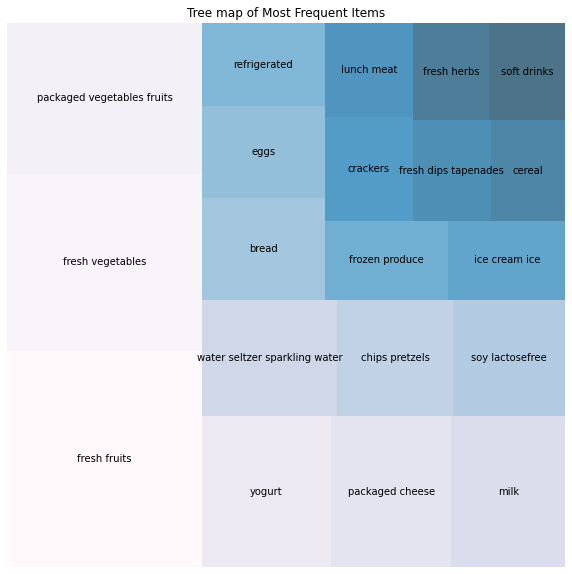

In [259]:
import squarify
plt.rcParams['figure.figsize']=(10,10)
Items = order_type3.aisle.value_counts().head(20).to_frame()
size = Items.values
lab = Items.index
color = plt.cm.PuBu(np.linspace(0,1,20))
squarify.plot(sizes=size, label=lab, alpha = 0.7, color=color)
plt.title('Tree map of Most Frequent Items')
plt.axis('off')
plt.show()

## Apriori算法

In [268]:
from mlxtend.frequent_patterns import association_rules, apriori
start1 = dt.datetime.now()
frq_items = apriori(data1, min_support = 0.05, use_colnames = True)
end1 = dt.datetime.now()
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
328,"(fresh herbs, packaged vegetables fruits)",(fresh vegetables),0.057641,0.450975,0.052184,0.905329,2.007491,0.026189,5.799267
215,"(fresh herbs, fresh fruits)",(fresh vegetables),0.074446,0.450975,0.066947,0.899263,1.994041,0.033373,5.450076
479,"(yogurt, fresh vegetables, packaged vegetables...",(fresh fruits),0.094940,0.550099,0.083173,0.876054,1.592537,0.030946,3.629800
423,"(milk, fresh vegetables, packaged vegetables f...",(fresh fruits),0.073615,0.550099,0.063929,0.868413,1.578647,0.023433,3.419032
465,"(fresh vegetables, soy lactosefree, packaged v...",(fresh fruits),0.064721,0.550099,0.056147,0.867522,1.577028,0.020544,3.396049
...,...,...,...,...,...,...,...,...,...
462,(fresh fruits),"(yogurt, fresh vegetables, packaged cheese)",0.550099,0.059165,0.051056,0.092812,1.568697,0.018509,1.037089
81,(fresh fruits),(packaged produce),0.550099,0.074903,0.050728,0.092216,1.231139,0.009524,1.019072
420,(fresh fruits),"(eggs, fresh vegetables, packaged vegetables f...",0.550099,0.059676,0.050614,0.092009,1.541809,0.017786,1.035609
213,(fresh fruits),"(fresh dips tapenades, fresh vegetables)",0.550099,0.061421,0.050058,0.090997,1.481531,0.016270,1.032537


In [269]:
end1-start1

datetime.timedelta(seconds=6, microseconds=260930)

In [261]:
rules20=rules.head(20)
rules20

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
328,"(fresh herbs, packaged vegetables fruits)",(fresh vegetables),0.057641,0.450975,0.052184,0.905329,2.007491,0.026189,5.799267
215,"(fresh herbs, fresh fruits)",(fresh vegetables),0.074446,0.450975,0.066947,0.899263,1.994041,0.033373,5.450076
479,"(yogurt, fresh vegetables, packaged vegetables...",(fresh fruits),0.094940,0.550099,0.083173,0.876054,1.592537,0.030946,3.629800
423,"(milk, fresh vegetables, packaged vegetables f...",(fresh fruits),0.073615,0.550099,0.063929,0.868413,1.578647,0.023433,3.419032
465,"(fresh vegetables, soy lactosefree, packaged v...",(fresh fruits),0.064721,0.550099,0.056147,0.867522,1.577028,0.020544,3.396049
451,"(yogurt, fresh vegetables, packaged cheese)",(fresh fruits),0.059165,0.550099,0.051056,0.862940,1.568697,0.018509,3.282498
96,(fresh herbs),(fresh vegetables),0.096868,0.450975,0.083470,0.861684,1.910712,0.039785,3.969343
395,"(bread, fresh vegetables, packaged vegetables ...",(fresh fruits),0.058228,0.550099,0.050050,0.859555,1.562545,0.018019,3.203392
409,"(eggs, fresh vegetables, packaged vegetables f...",(fresh fruits),0.059676,0.550099,0.050614,0.848148,1.541809,0.017786,2.962760
437,"(packaged vegetables fruits, fresh vegetables,...",(fresh fruits),0.091221,0.550099,0.076626,0.840003,1.527003,0.026445,2.811937


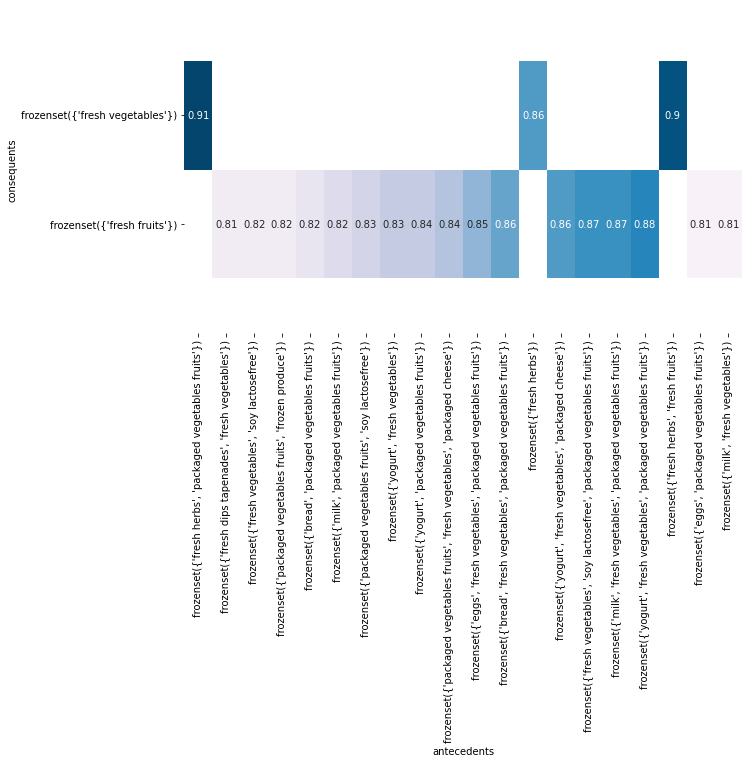

In [262]:
# Transform antecedent, consequent, and support columns into matrix
support_table = rules20.pivot(index='consequents', columns='antecedents', values='confidence')

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(support_table, annot=True, cbar=False, cmap=sns.color_palette('PuBu',20))
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t)
plt.yticks(rotation=0)
plt.show() 

## FP- growth

In [270]:
from mlxtend.frequent_patterns import fpgrowth
start2 = dt.datetime.now()
frq_fp=fpgrowth(data1, min_support=0.05, use_colnames=True)
end2 = dt.datetime.now()
end2-start2


datetime.timedelta(seconds=7, microseconds=805532)

In [264]:
rules_fp = association_rules(frq_fp, metric="lift", min_threshold=1)
rules_fp['roundlift'] = round(rules_fp.lift,6)
rules_fp = rules_fp.drop_duplicates(subset='roundlift')
rules_fp20=rules_fp.head(20)
rules_fp20

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,roundlift
0,(fresh vegetables),(fresh fruits),0.450975,0.550099,0.327333,0.725833,1.319458,0.079252,1.640974,1.319458
2,(yogurt),(fresh fruits),0.253405,0.550099,0.185102,0.730458,1.327865,0.045704,1.669130,1.327865
4,(yogurt),(fresh vegetables),0.253405,0.450975,0.146682,0.578844,1.283540,0.032403,1.303615,1.283540
6,(yogurt),(packaged vegetables fruits),0.253405,0.383030,0.132834,0.524196,1.368551,0.035772,1.296690,1.368551
8,"(yogurt, fresh vegetables)",(fresh fruits),0.146682,0.550099,0.122240,0.833368,1.514941,0.041550,2.699964,1.514941
9,"(yogurt, fresh fruits)",(fresh vegetables),0.185102,0.450975,0.122240,0.660394,1.464370,0.038764,1.616654,1.464370
10,"(fresh vegetables, fresh fruits)",(yogurt),0.327333,0.253405,0.122240,0.373443,1.473701,0.039292,1.191584,1.473701
14,"(yogurt, packaged vegetables fruits)",(fresh fruits),0.132834,0.550099,0.111105,0.836422,1.520492,0.038033,2.750374,1.520492
15,"(yogurt, fresh fruits)",(packaged vegetables fruits),0.185102,0.383030,0.111105,0.600239,1.567080,0.040206,1.543346,1.567080
16,"(packaged vegetables fruits, fresh fruits)",(yogurt),0.287282,0.253405,0.111105,0.386746,1.526198,0.038306,1.217432,1.526198


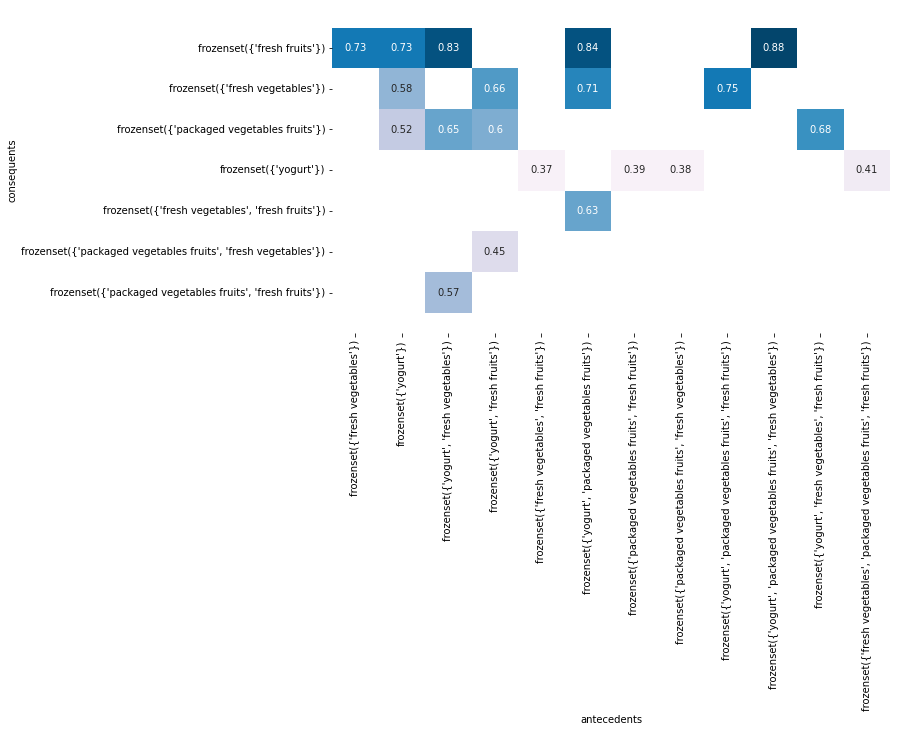

In [265]:
# Transform antecedent, consequent, and support columns into matrix
support_table_fp = rules_fp20.pivot(index='consequents', columns='antecedents', values='confidence')

plt.figure(figsize=(10,6))
sns.heatmap(support_table_fp, annot=True, cbar=False, cmap=sns.color_palette('PuBu',20))
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t)
plt.yticks(rotation=0)
plt.show() 